In [232]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import datetime as dt

In [233]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')

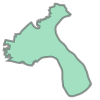

In [234]:
zipcodes.loc[0, 'geometry']

In [235]:
tornado_911 = pd.read_csv( '../data/911_Phone_Calls_Tornado_030320.csv')
derecho_911 = pd.read_csv('../data/911_Phone Calls_Derecho_050320 050420.csv')
tornado_dispact = pd.read_csv('../data/Computer Aided Dispatch Data_Tornado Incidents 030320.csv', skiprows=2)
derecho_dispatch = pd.read_csv('../data/Computer Aided Dispatch Data_Derecho Incidents 050320-050420.csv', skiprows=2)

In [236]:
print(derecho_dispatch)

             IncidentDate            Location  Latitude1  Longitude1  \
0     5/3/2020 4:31:07 PM    901 KENWICK CT W  36.046877  -86.962526   
1     5/3/2020 4:32:18 PM       8036 ARBOR DR  36.082491  -86.940680   
2     5/3/2020 4:32:23 PM   119 DUE WEST AV E  36.248029  -86.716875   
3     5/3/2020 4:33:04 PM  630 GALLATIN PKE S  36.256491  -86.714817   
4     5/3/2020 4:33:52 PM   615 W HILLWOOD DR  36.129690  -86.879834   
..                    ...                 ...        ...         ...   
622  5/4/2020 12:21:00 AM       625 BENTON AV  36.131384  -86.770628   
623  5/4/2020 12:21:32 AM    518 BRENTLAWN DR  36.064362  -86.761199   
624  5/4/2020 12:22:47 AM       517 ALBANY DR  36.212754  -86.600431   
625  5/4/2020 12:27:52 AM    639 LAFAYETTE ST  36.153769  -86.777520   
626  5/4/2020 12:29:50 AM      2011 HAYES ST   36.151839  -86.800791   

                             IncidentTypeDescription1  
0                                   ELECTRICAL HAZARD  
1                      

In [237]:
derecho_dispatch.dtypes

IncidentDate                 object
Location                     object
Latitude1                   float64
Longitude1                  float64
IncidentTypeDescription1     object
dtype: object

In [238]:
print(derecho_dispatch.columns)

Index(['IncidentDate', 'Location', 'Latitude1', 'Longitude1',
       'IncidentTypeDescription1'],
      dtype='object')


In [239]:
derecho_dispatch.columns = ['Seizure DateTime', 'Location', 'lat', 'lng', 'Incident Type']

In [240]:
print(derecho_dispatch.head(3))

      Seizure DateTime           Location        lat        lng  \
0  5/3/2020 4:31:07 PM   901 KENWICK CT W  36.046877 -86.962526   
1  5/3/2020 4:32:18 PM      8036 ARBOR DR  36.082491 -86.940680   
2  5/3/2020 4:32:23 PM  119 DUE WEST AV E  36.248029 -86.716875   

       Incident Type  
0  ELECTRICAL HAZARD  
1  ELECTRICAL HAZARD  
2     NOT ALERT COPD  


In [241]:
derecho_dispatch['geometry'] = derecho_dispatch.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)

In [242]:
derecho_dispatch_geo = gpd.GeoDataFrame(derecho_dispatch, 
                           crs = zipcodes.crs, 
                           geometry = derecho_dispatch['geometry'])

In [243]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [244]:
calls_by_zip = gpd.sjoin(derecho_dispatch_geo, zipcodes, op = 'within')

In [245]:
calls_by_zip.head(5)

Seizure DateTime              Location        lat        lng  \
0    5/3/2020 4:31:07 PM      901 KENWICK CT W  36.046877 -86.962526   
1    5/3/2020 4:32:18 PM         8036 ARBOR DR  36.082491 -86.940680   
17   5/3/2020 4:39:57 PM  8715 OLD HARDING PKE  36.012524 -87.024584   
88   5/3/2020 5:12:40 PM          7205 MARK DR  36.065849 -86.928772   
116  5/3/2020 5:25:03 PM    1651 CHICKERING RD  36.059848 -86.874532   

            Incident Type                    geometry  index_right    zip  \
0       ELECTRICAL HAZARD  POINT (-86.96253 36.04688)            7  37221   
1       ELECTRICAL HAZARD  POINT (-86.94068 36.08249)            7  37221   
17      ELECTRICAL HAZARD  POINT (-87.02458 36.01252)            7  37221   
88      ELECTRICAL HAZARD  POINT (-86.92877 36.06585)            7  37221   
116  ENTRAPMENT / TRAPPED  POINT (-86.87453 36.05985)            7  37221   

       po_name  
0    NASHVILLE  
1    NASHVILLE  
17   NASHVILLE  
88   NASHVILLE  
116  NASHVILLE

In [246]:
calls_by_zip['zip'].value_counts()

37211    79
37076    61
37205    57
37013    56
37214    37
37215    34
37204    29
37217    27
37221    27
37210    26
37212    25
37209    25
37203    20
37207    20
37220    19
37115    15
37216    12
37208    12
37206     9
37027     8
37138     6
37218     6
37072     5
37080     3
37228     2
37219     1
37232     1
37189     1
37143     1
37201     1
Name: zip, dtype: int64

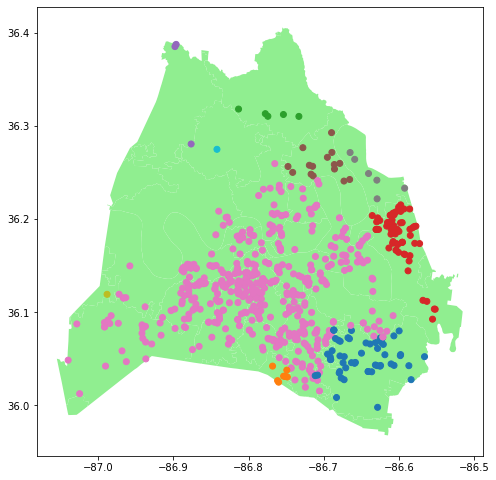

In [247]:
ax = zipcodes.plot(figsize = (8, 10), color = 'lightgreen')
calls_by_zip.plot( ax = ax, column = 'po_name');
plt.show();

In [248]:
center = calls_by_zip.geometry.centroid[500]

<ipython-input-248-a4d7b2f9bc33>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = calls_by_zip.geometry.centroid[500]


In [249]:
area_center = [center.y, center.x]

In [250]:
print(area_center)

[36.16942259, -86.75816033]


In [291]:
derecho_dispatch_map = folium.Map(location =  area_center, zoom_start = 12)


In [252]:
print(derecho_dispatch.head(5))

      Seizure DateTime            Location        lat        lng  \
0  5/3/2020 4:31:07 PM    901 KENWICK CT W  36.046877 -86.962526   
1  5/3/2020 4:32:18 PM       8036 ARBOR DR  36.082491 -86.940680   
2  5/3/2020 4:32:23 PM   119 DUE WEST AV E  36.248029 -86.716875   
3  5/3/2020 4:33:04 PM  630 GALLATIN PKE S  36.256491 -86.714817   
4  5/3/2020 4:33:52 PM   615 W HILLWOOD DR  36.129690 -86.879834   

       Incident Type                    geometry  
0  ELECTRICAL HAZARD  POINT (-86.96253 36.04688)  
1  ELECTRICAL HAZARD  POINT (-86.94068 36.08249)  
2     NOT ALERT COPD  POINT (-86.71687 36.24803)  
3     ABDOMINAL PAIN  POINT (-86.71482 36.25649)  
4  ELECTRICAL HAZARD  POINT (-86.87983 36.12969)  


#derecho_dispatch['Seizure DateTime'] = pd.to_datetime(derecho_dispatch['Seizure DateTime'])
derecho_dispatch = derecho_dispatch.resample('15min', on='Seizure DateTime').Incident_Type.count()#

In [253]:
#start_time = '2020-05-03 16:30:00'
#end_time = '2020-05-03 21:00:00'
#new_derecho_dispatch = derecho_dispatch[(derecho_dispatch['Seizure DateTime'] >= start_time) & (derecho_dispatch['Seizure DateTime'] <= end_time)]



In [254]:
#new_derecho_plot = new_derecho_dispatch.resample('15min', on='Seizure DateTime').Incident_Type.count()

In [257]:
derecho_dispatch["Incident Type"].value_counts()

ELECTRICAL HAZARD                                               370
GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD                      23
MVA INJURIES:                                                     8
SMALL OUTSIDE FIRE                                                6
SMALL BUILDING INVESTIGATION                                      6
                                                               ... 
WATER PROBLEM WITH ELECTRICAL HAZARD                              1
OUTSIDE NATURAL GAS ODOR RESIDENTIAL LINE   TANK LESS 5 GALL      1
OBVIOUS DEATH                                                     1
POSSIBLY DANGEROUS BODY AREA                                      1
SEIZURE: EFFECTIVE BREATHING NOT VERIFIED >35                     1
Name: Incident Type, Length: 122, dtype: int64

In [290]:
searchfor = ['COMMERCIAL', 'INDUS']
derecho_commercial_industrial = derecho_dispatch[derecho_dispatch['Incident Type'].str.contains('|'.join(searchfor))]

In [289]:
print(derecho_commercial_industrial)

         Seizure DateTime                       Location        lat  \
8     5/3/2020 4:36:42 PM                3000 POSTON AV   36.145332   
16    5/3/2020 4:39:33 PM               2106 FAIRFAX AV   36.134384   
18    5/3/2020 4:40:05 PM               188 THOMPSON LN   36.110859   
22    5/3/2020 4:42:13 PM                 1310 24TH AV S  36.142084   
25    5/3/2020 4:43:37 PM        607B LARKIN SPRINGS RD   36.253562   
32    5/3/2020 4:46:29 PM              531 DONELSON PKE   36.146637   
36    5/3/2020 4:48:18 PM               555 MARRIOTT DR   36.151108   
41    5/3/2020 4:49:41 PM                  3960 BELL RD   36.166478   
42    5/3/2020 4:49:41 PM                  3960 BELL RD   36.166478   
75    5/3/2020 5:06:04 PM              2030 BERNARD CIR   36.131260   
171   5/3/2020 5:54:04 PM                 2136 CLIFF DR   36.196360   
200   5/3/2020 6:09:07 PM                 6005 DANA WAY   36.036036   
221   5/3/2020 6:21:24 PM           5825 CROSSINGS BLVD   36.036319   
311   

In [268]:
searchfor = ['ELECTRICAL HAZARD', 'GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD']
derecho_electrical_alarm = derecho_dispatch[derecho_dispatch['Incident Type'].str.contains('|'.join(searchfor))]

In [269]:
print(derecho_electrical_alarm)

         Seizure DateTime                         Location        lat  \
0     5/3/2020 4:31:07 PM                 901 KENWICK CT W  36.046877   
1     5/3/2020 4:32:18 PM                    8036 ARBOR DR  36.082491   
4     5/3/2020 4:33:52 PM                615 W HILLWOOD DR  36.129690   
5     5/3/2020 4:33:53 PM              622 BROOK HOLLOW RD  36.111773   
6     5/3/2020 4:34:19 PM  JOCELYN HOLLOW RD / BRESSLYN RD  36.103318   
..                    ...                              ...        ...   
612  5/3/2020 11:50:16 PM                    5029 SUTER DR  36.070686   
617  5/3/2020 11:58:29 PM                    2618 ESSEX PL  36.132719   
618  5/3/2020 11:59:51 PM                 304 ELMINGTON AV  36.133028   
620  5/4/2020 12:09:25 AM                 5820 LABRADOR LN  36.031867   
624  5/4/2020 12:22:47 AM                    517 ALBANY DR  36.212754   

           lng      Incident Type                    geometry  
0   -86.962526  ELECTRICAL HAZARD  POINT (-86.96253 36.0468

In [271]:
derecho_commercial_industrial_geo = gpd.GeoDataFrame(derecho_commercial_industrial, 
                           crs = zipcodes.crs, ## make a match
                           geometry = derecho_commercial_industrial['geometry'])

In [272]:
derecho_derecho_electrical_alarm_geo = gpd.GeoDataFrame(derecho_electrical_alarm, 
                           crs = zipcodes.crs, ## make a match
                           geometry = derecho_electrical_alarm['geometry'])

In [281]:
map_derecho_commercial_industrial = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(zipcodes).add_to(map_derecho_commercial_industrial)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in derecho_commercial_industrial.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Incident Type'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_derecho_commercial_industrial)

#display our map
map_derecho_commercial_industrial


In [285]:
map_derecho_electrical_alarm = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(zipcodes).add_to(map_derecho_electrical_alarm)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in derecho_electrical_alarm.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Incident Type'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_derecho_electrical_alarm)

#display our map
map_derecho_electrical_alarm